<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-monitor-workouts-using-ultralytics-yolo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Workouts monitoring using Ultralytics YOLO11 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Monitor Workouts using Ultralytics YOLO11

This notebook serves as a starting point for [monitoring workouts](https://docs.ultralytics.com/guides/workouts-monitoring/) in videos or live streams using the YOLO11 model.

## What is Workout monitoring?

- Monitoring workouts through pose estimation with [Ultralytics YOLO11](https://github.com/ultralytics/ultralytics/) enhances exercise assessment by accurately tracking key body landmarks and joints in real-time. This technology provides instant feedback on exercise form, tracks workout routines, and measures performance metrics, optimizing training sessions for users and trainers alike.

## Advantages of Workouts Monitoring?

- **Optimized Performance:** Tailoring workouts based on monitoring data for better results.
- **Goal Achievement:** Track and adjust fitness goals for measurable progress.
- **Personalization:** Customized workout plans based on individual data for effectiveness.
- **Health Awareness:** Early detection of patterns indicating health issues or over-training.
- **Informed Decisions:** Data-driven decisions for adjusting routines and setting realistic goals.

## Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [2]:
!pip install ultralytics
!apt-get install -y ffmpeg  # for video writing properly


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: apt-get


In [ ]:
import cv2
import ultralytics
from ultralytics import solutions
from ultralytics.utils.downloads import safe_download

ultralytics.checks()

Ultralytics 8.3.173 🚀 Python-3.13.5 torch-2.7.1 CPU (Apple M4 Pro)
Setup complete ✅ (14 CPUs, 48.0 GB RAM, 688.7/926.4 GB disk)


## Exercises list

Ultralytics supports various workout exercises, including sample videos for some exercises. We will start by downloading these videos for use later in the notebook.

- Legextension
- Legpress
- Squats
- Pushups

In [3]:
exercises_list = ["Legextension", "Legpress", "Squats", "Pushups"]

for exercise in exercises_list:
    safe_download(f"https://github.com/ultralytics/assets/releases/download/v0.0.0/{exercise}.demo.video.mp4")

## KeyPoints Map

This keypoint map allows you to adjust the keypoints for monitoring workouts. Using these keypoints, various workout exercises can be effectively tracked and analyzed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/ultralytics/docs/releases/download/0/keypoints-order-ultralytics-yolov8-pose.avif" width="480">

## Arguments `AIGym`

| Name         | Type    | Default | Description                                                                            |
| ------------ | ------- | ------- | -------------------------------------------------------------------------------------- |
| `kpts`       | `list`  | `None`  | List of three keypoints index, for counting specific workout, followed by keypoint Map |
| `line_width` | `int`   | `2`     | Thickness of the lines drawn.                                                          |
| `show`       | `bool`  | `False` | Flag to display the image.                                                             |
| `up_angle`   | `float` | `145.0` | Angle threshold for the 'up' pose.                                                     |
| `down_angle` | `float` | `90.0`  | Angle threshold for the 'down' pose.                                                   |
| `model`      | `str`   | `None`  | Path to Ultralytics YOLO Pose Model File                                               |

## Push-ups counting

Push-up counting tracks the number of push-ups performed by detecting the body's movement in each frame. It ensures accurate rep counting and can assess form based on joint angles for improved workout tracking.

In [6]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt


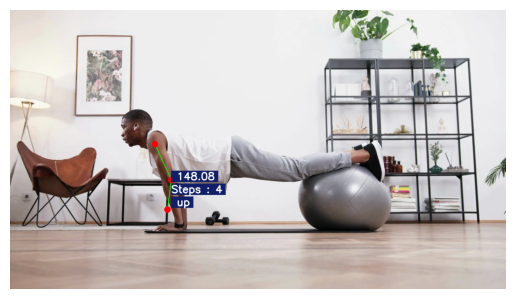

Video frame is empty or video processing has been successfully completed.


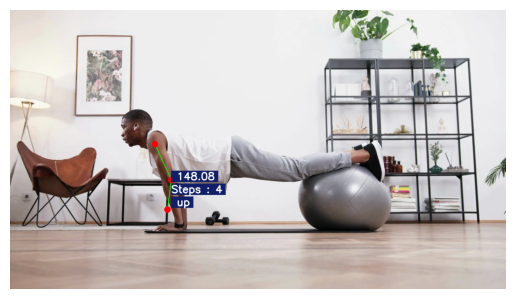

In [8]:
cap = cv2.VideoCapture("Pushups.demo.video.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Pushups.demo.video.output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init AIGym
gym = solutions.AIGym(
    show=True,  # Display the frame
    kpts=[5, 7, 9],  # keypoints index of person for monitoring specific exercise, by default it's for pushup
    model="yolo11n-pose.pt",  # Path to the YOLO11 pose estimation model file
    line_width=4,  # Adjust the line width for bounding boxes and text display
    verbose=False,
)

frame_count = 0
# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = gym(im0)  # monitor workouts on each frame
    video_writer.write(results.plot_im)  # write the output frame in file.

    frame_count += 1
    if frame_count % 10 == 0:  # show every 10th frame
        # show in jupyter
        plt.imshow(cv2.cvtColor(results.plot_im, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())


video_writer.release()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/bd2f6eec-7ec7-4063-b05a-5bcb9f62622c" width="720">

## Monitor your Squats

Squat counting tracks the number of squats performed by detecting the movement of the body in each frame. It ensures accurate rep counting and evaluates form by monitoring the angle of the knees and hips for proper technique.


In [9]:
cap = cv2.VideoCapture("Squats.demo.video.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Squats.demo.video.output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init AIGym
gym = solutions.AIGym(
    show=True,  # Display the frame
    kpts=[5, 11, 13],  # keypoints index of person for monitoring specific exercise, by default it's for pushup
    model="yolo11m-pose.pt",  # Path to the YOLO11 pose estimation model file
    line_width=4,  # Adjust the line width for bounding boxes and text display
    verbose=False,
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = gym(im0)  # monitor workouts on each frame
    video_writer.write(results.plot_im)  # write the output frame in file.

video_writer.release()

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11m-pose.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [5, 11, 13], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 4, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': False, 'data': 'images'}


Video frame is empty or video processing has been successfully completed.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/4c0e92a1-a204-467c-92ad-4d58add38efa" width="720">

## Legpress Monitoring

Leg press counting tracks the number of reps by detecting leg movement and monitoring knee and hip angles. It ensures accurate counting and proper form during the exercise.

In [10]:
cap = cv2.VideoCapture("Legpress.demo.video.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Legpress.demo.video.output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init AIGym
gym = solutions.AIGym(
    show=True,  # Display the frame
    kpts=[11, 13, 15],  # keypoints index of person for monitoring specific exercise, by default it's for pushup
    model="yolo11x-pose.pt",  # Path to the YOLO11 pose estimation model file
    line_width=4,  # Adjust the line width for bounding boxes and text display
    up_angle=140,
    down_angle=120,
    verbose=False,
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = gym(im0)  # monitor workouts on each frame
    video_writer.write(results.plot_im)  # write the output frame in file.

video_writer.release()

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11x-pose.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 140, 'down_angle': 120, 'kpts': [11, 13, 15], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 4, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': False, 'data': 'images'}


Video frame is empty or video processing has been successfully completed.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/be76f50c-44d7-4141-b88e-c9d711be277b" width="720">

## Monitor Legextension

Leg extension counting tracks the number of reps by detecting the movement of the legs as they extend against the resistance. It monitors the knee and hip angles to ensure accurate counting and proper form throughout the exercise.

In [ ]:
cap = cv2.VideoCapture("Legextension.demo.video.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("Legextension.demo.video.output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init AIGym
gym = solutions.AIGym(
    show=True,  # Display the frame
    kpts=[12, 14, 16],  # keypoints index of person for monitoring specific exercise, by default it's for pushup
    model="yolo11m-pose.pt",  # Path to the YOLO11 pose estimation model file
    line_width=4,  # Adjust the line width for bounding boxes and text display
    verbose=False,
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = gym(im0)  # monitor workouts on each frame
    video_writer.write(results.plot_im)  # write the output frame in file.

video_writer.release()

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11m-pose.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [12, 14, 16], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 4, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': False, 'data': 'images'}
Video frame is empty or video processing has been successfully completed.


: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/5f20438c-dce7-48d0-abd0-0dc6bc1285c7" width="720">

Crafted with 💙 by [Ultralytics](https://ultralytics.com/)  

🌟 Explore and star the [Ultralytics Notebooks](https://github.com/ultralytics/notebooks/) to supercharge your AI journey! 🚀